In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
store_df = pd.read_csv("stores.csv")
feature_df = pd.read_csv("features.csv")

In [ ]:
train_df1 = train_df.merge(feature_df, how = "inner", indicator = True).merge(store_df, how = "left")

In [ ]:
train_df1.dtypes

Store              int64
Dept               int64
Date              object
Weekly_Sales     float64
IsHoliday           bool
Temperature      float64
Fuel_Price       float64
MarkDown1        float64
MarkDown2        float64
MarkDown3        float64
MarkDown4        float64
MarkDown5        float64
CPI              float64
Unemployment     float64
_merge          category
Type              object
Size               int64
dtype: object

In [ ]:
train_df1["IsHoliday"] = train_df1["IsHoliday"].replace({True: 1, False: 0}).astype("object")

In [ ]:
train_df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,2,2010-02-05,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
2,1,3,2010-02-05,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
3,1,4,2010-02-05,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
4,1,5,2010-02-05,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,both,B,118221
421566,45,94,2012-10-26,5203.31,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,both,B,118221
421567,45,95,2012-10-26,56017.47,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,both,B,118221
421568,45,97,2012-10-26,6817.48,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,both,B,118221


In [ ]:
train_df1["Year"] = pd.DatetimeIndex(train_df1["Date"]).year
train_df1["Month"] = pd.DatetimeIndex(train_df1["Date"]).month
train_df1["Week"] = pd.DatetimeIndex(train_df1["Date"]).week

<ipython-input-7-1daaa072fd11>:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  train_df1["Week"] = pd.DatetimeIndex(train_df1["Date"]).week


In [ ]:
train_df1 = train_df1.drop(train_df1.loc[train_df1["Weekly_Sales"] < 0].index).sort_values(by = "Date")

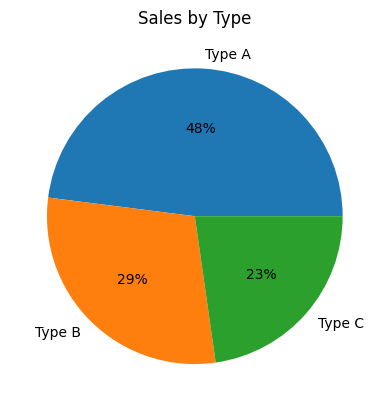

In [ ]:
stores = ["Type A", "Type B", "Type C"]
data = train_df1.groupby("Type").Weekly_Sales.mean()
fig, ax = plt.subplots()
plt.pie(data, labels = stores, autopct = "%.0f%%")
ax.set_title("Sales by Type")
plt.show()

Using heatmap to see the correlation between each feature.
- Fuel price has positive correlation with year, indicating that the fuel price has been rising.
- Markdowns are positively related to store size and weekly sales.

<ipython-input-17-37c125b28f15>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(train_df1.corr())


<Axes: >

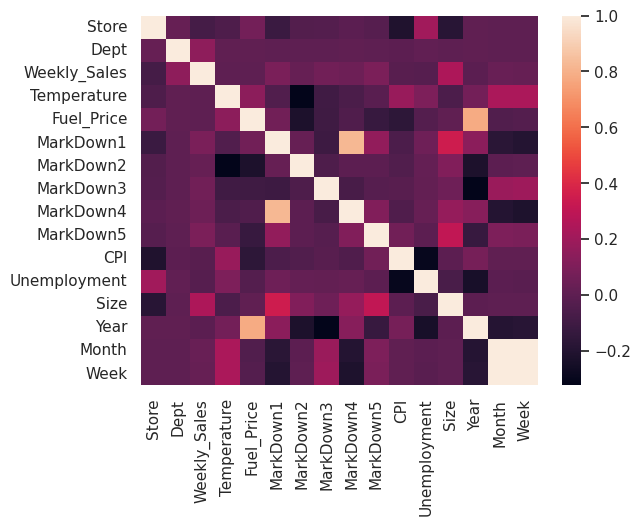

In [ ]:
sns.set_theme(style = "whitegrid")
heatmap = sns.heatmap(train_df1.corr())
heatmap


The line plot shows that monthly sales trend of each year is quite similar. Year end festival season boosts a lot of sales.

<Axes: xlabel='Month'>

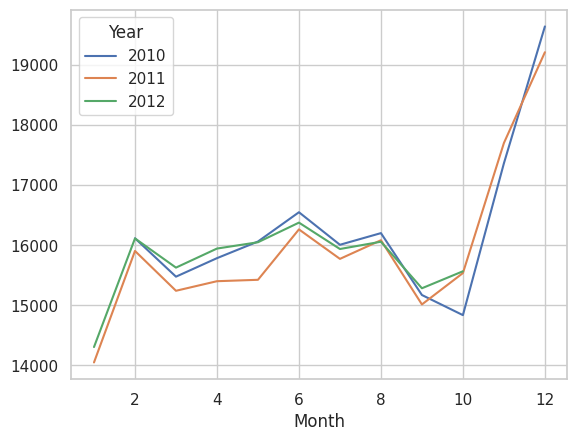

In [ ]:
month_wise_sales = pd.pivot_table(train_df1, values = "Weekly_Sales", columns = "Year", index = "Month")
month_wise_sales.plot()

# Time Series Analysis

First I took store 1 sales as an example and apply time series techniques:

1. Apply augmented Dicky-Fuller test to see if the time series is stationary, i.e. the distribution of the data doesn’t change with time
2. Plot the correlation between a time series and itself with n lags using ACF and PACF
3. Using AIC and BIC to find the most suitable ARMA model parameters (p,q)
 - p: time series autoregressive value
 - q: shock value

In [ ]:
sales_store1 = train_df1.groupby(["Store", "Date"]).Weekly_Sales.sum().to_frame().reset_index()

In [ ]:
sales_store1

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1612831.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
...,...,...,...
6430,45,2012-09-28,713173.95
6431,45,2012-10-05,733455.07
6432,45,2012-10-12,734464.36
6433,45,2012-10-19,718125.53


In [ ]:
sales_store1 = sales_store1.loc[sales_store1["Store"]== 1]

In [ ]:
sales_store1

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1612831.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
...,...,...,...
138,1,2012-09-28,1437059.26
139,1,2012-10-05,1670785.97
140,1,2012-10-12,1573072.81
141,1,2012-10-19,1508068.77


In [ ]:
sales_store1 = sales_store1.loc[:, "Weekly_Sales"]

In [ ]:
sales_store1

0      1643690.90
1      1641957.44
2      1612831.17
3      1409727.59
4      1554806.68
          ...    
138    1437059.26
139    1670785.97
140    1573072.81
141    1508068.77
142    1493659.74
Name: Weekly_Sales, Length: 143, dtype: float64

In [ ]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(sales_store1)
print(results)

(-5.102288391725713, 1.3871217819310194e-05, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 3412.7610002410356)


(no need for now) If the p-value is larger than 0.05 meaning that we can not reject the null hypothesis that the time series is non-stationary. To convert it to stationery, take the first difference and plot it and apply the augmented Dicky-Fuller test

In [ ]:
'''
sales_store1_diff = sales_store1.diff()
sales_store1_diff = sales_store1_diff.dropna()

# Run Dicky-Fuller test
result_diff = adfuller(sales_store1_diff)
print(result_diff)
# Print test statistic
print('The test stastics:', result_diff[0])

# Print p-value
print("The p-value:",result_diff[1])
'''

'\nsales_store1_diff = sales_store1.diff()\nsales_store1_diff = sales_store1_diff.dropna()\n\n# Run Dicky-Fuller test\nresult_diff = adfuller(sales_store1_diff)\nprint(result_diff)\n# Print test statistic\nprint(\'The test stastics:\', result_diff[0])\n\n# Print p-value\nprint("The p-value:",result_diff[1])\n'

<Axes: >

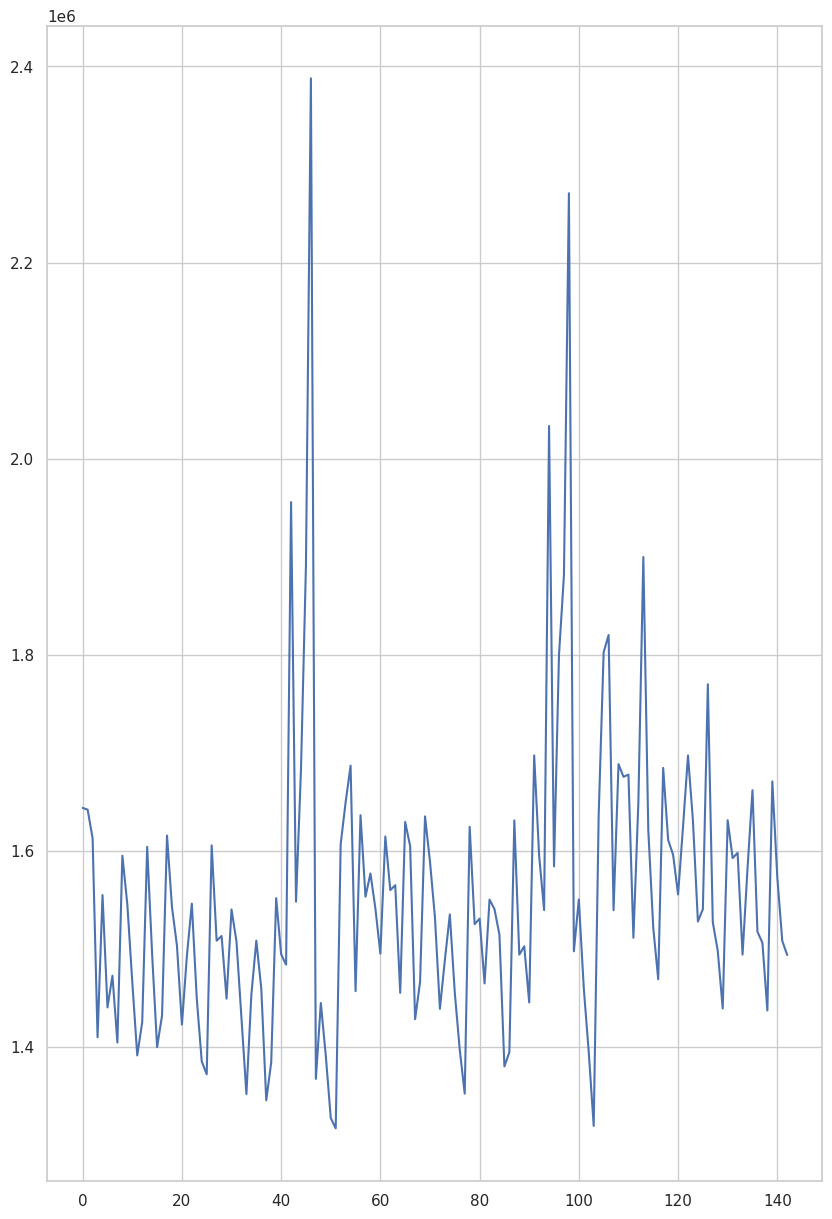

In [ ]:
sales_store1.plot()

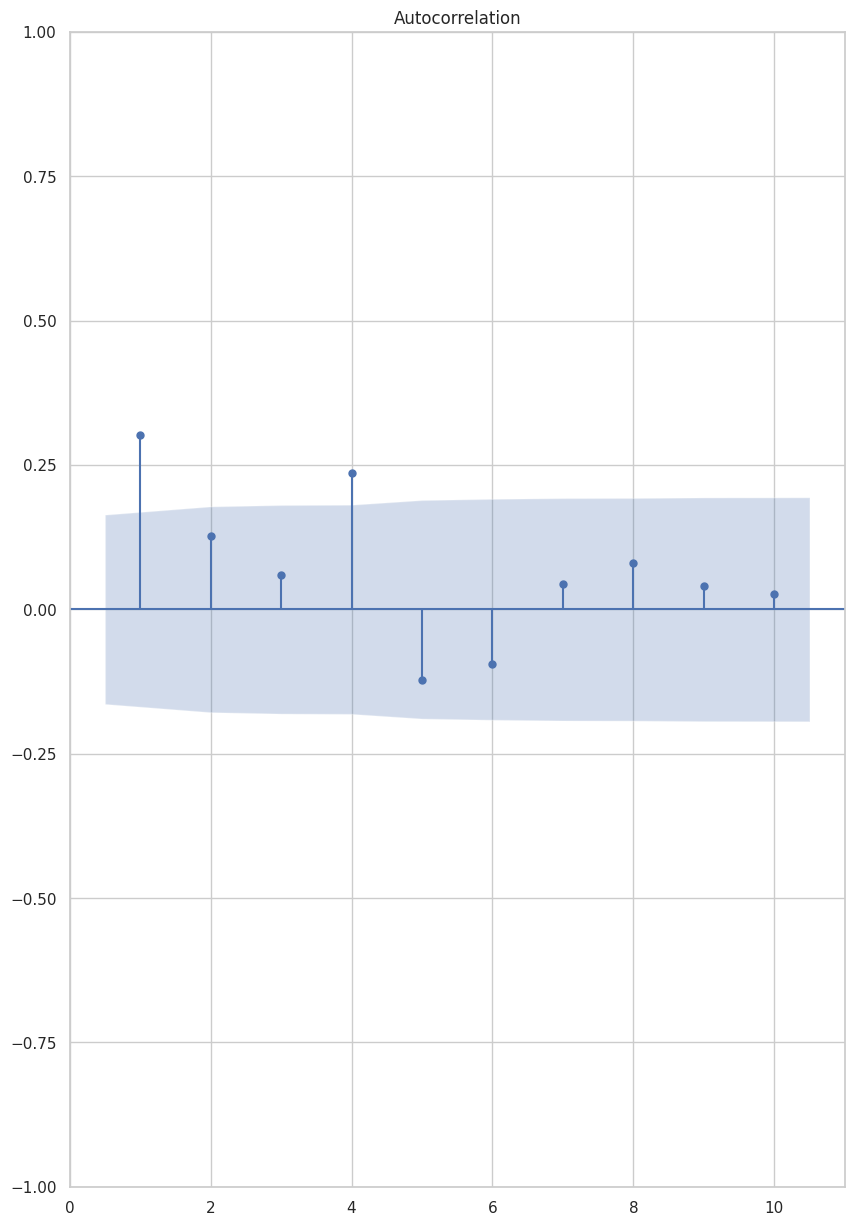

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Make ACF plot
plot_acf(sales_store1, lags=10, zero=False)
plt.show()

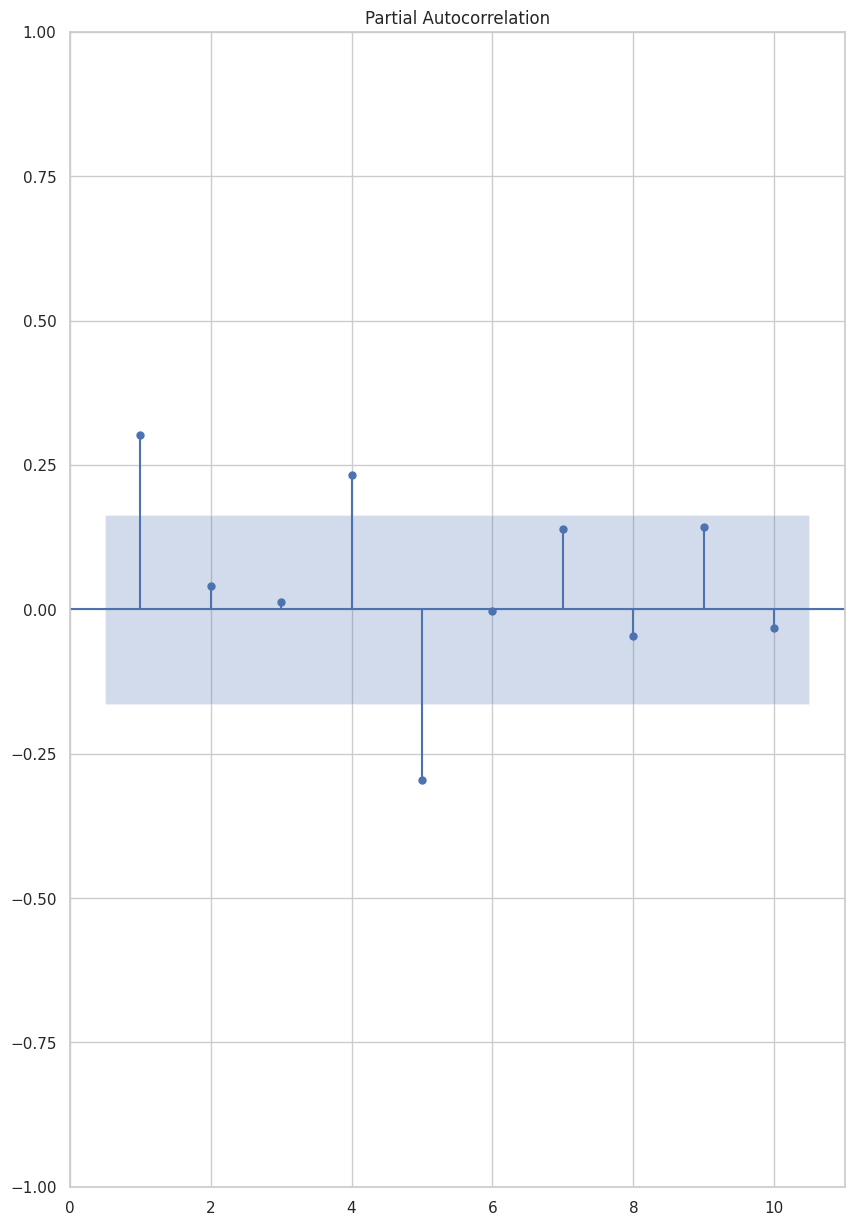

In [ ]:
# Make PACF plot
plot_pacf(sales_store1, lags=10, zero=False)
plt.show()

In [ ]:
import statsmodels.api as sm
order_aic_bic =[]

# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):

        try:
            # create and fit ARMA(p,q) model
            model = sm.tsa.statespace.SARIMAX(sales_store1, order=(p, 0, q))
            results = model.fit()

            # Print order and results
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            print(p, q, None, None)

# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic','bic'])

# lets sort them by AIC and BIC

# Sort by AIC
print("Sorted by AIC ")
print("\n")
print(order_df.sort_values('aic').reset_index(drop=True))

# Sort by BIC
print("Sorted by BIC ")
print("\n")
print(order_df.sort_values('bic').reset_index(drop=True))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Sorted by AIC 


   p  q          aic          bic
0  2  1  3830.731056  3842.582435
1  1  2  3832.569826  3844.421204
2  1  1  3836.337184  3845.225718
3  2  2  3838.268271  3853.082494
4  2  0  3861.750284  3870.638818
5  1  0  3880.926116  3886.851805
6  0  2  4367.359909  4376.248443
7  0  1  4392.768590  4398.694279
8  0  0  4486.789633  4489.752477
Sorted by BIC 


   p  q          aic          bic
0  2  1  3830.731056  3842.582435
1  1  2  3832.569826  3844.421204
2  1  1  3836.337184  3845.225718
3  2  2  3838.268271  3853.082494
4  2  0  3861.750284  3870.638818
5  1  0  3880.926116  3886.851805
6  0  2  4367.359909  4376.248443
7  0  1  4392.768590  4398.694279
8  0  0  4486.789633  4489.752477


In [ ]:
# The model with the best p and q found from pervious step
model = sm.tsa.statespace.SARIMAX(sales_store1, order=(2, 0, 1))
# Fit model
results = model.fit()
# Assign residuals to variable
residuals = results.resid
print(residuals)

0      1.643691e+06
1      1.236851e+04
2     -2.073187e+04
3     -2.103347e+05
4      3.469651e+04
           ...     
138   -1.265681e+05
139    1.304150e+05
140   -3.573844e+04
141   -7.275214e+04
142   -6.685925e+04
Length: 143, dtype: float64


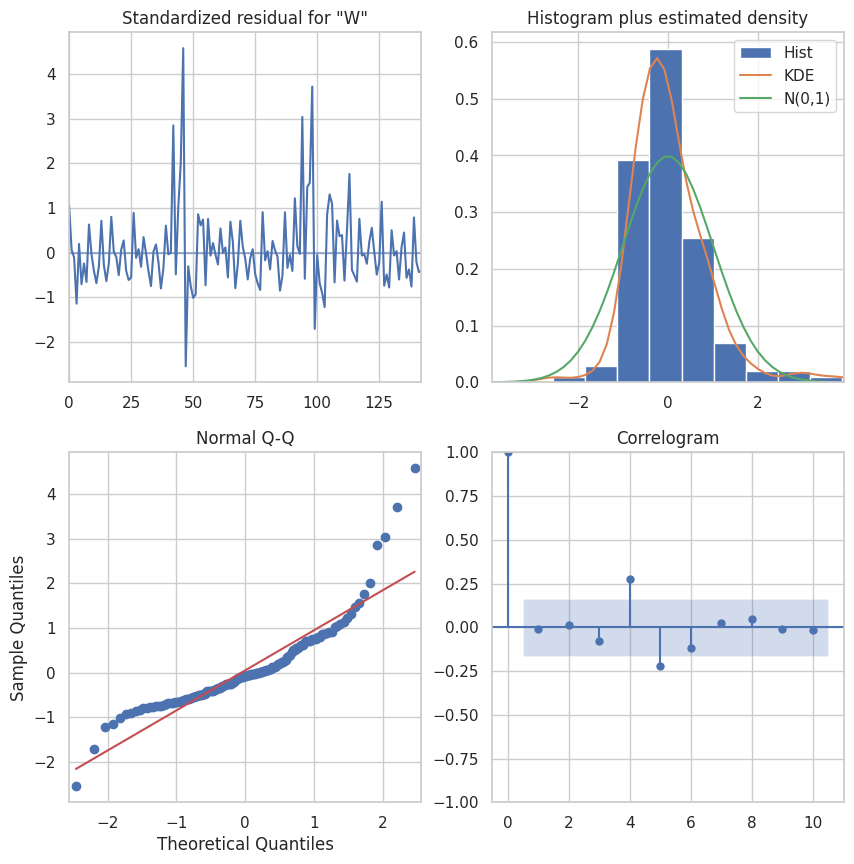

In [ ]:
results.plot_diagnostics(figsize=(10,10))
plt.show()

# Seasonal Time Series
It is obvious from previous plot that Walmart sales has seasonal pattern. Therefore we will apply SARIMA with seasonal factors added into the forecast.

<Axes: >

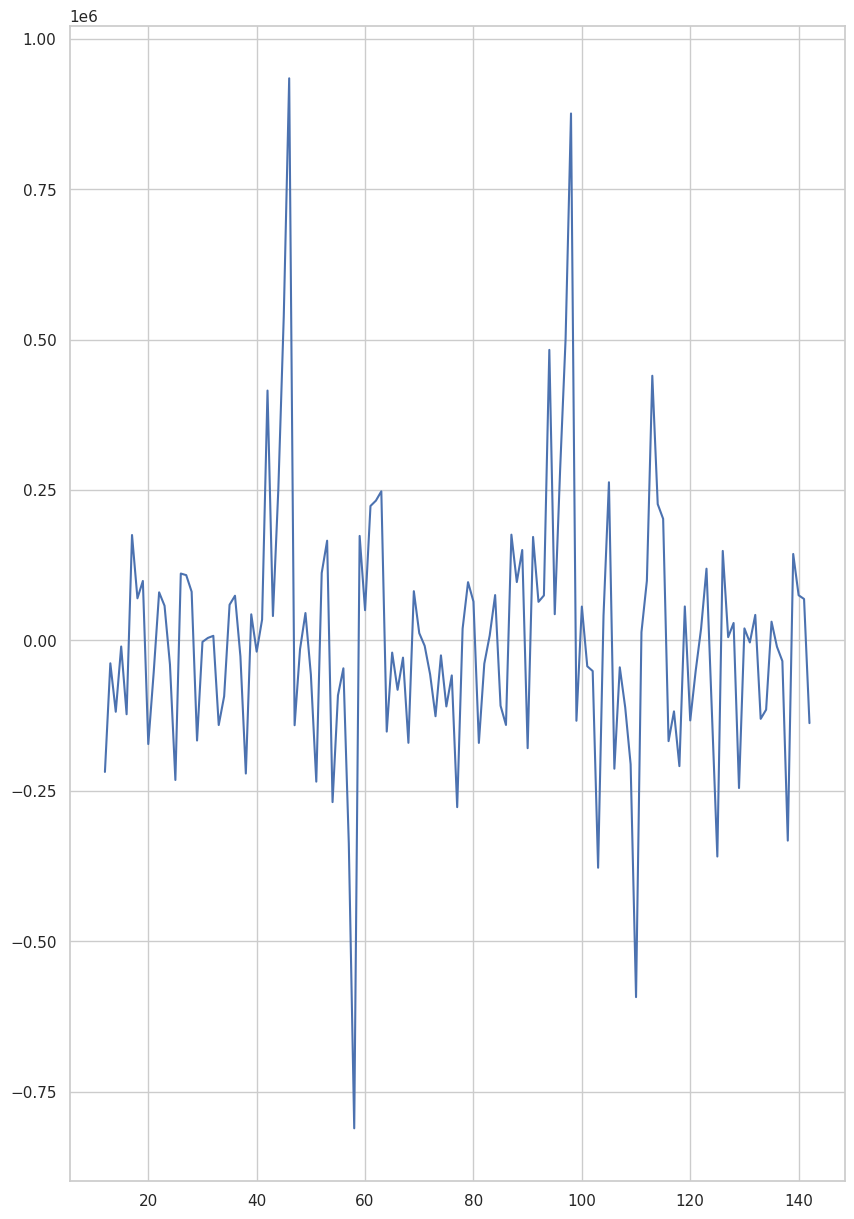

In [ ]:
S = 12
sales_diff = sales_store1.diff(S)
sales_diff.plot()

In [ ]:
# Fitting a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Instantiate model
S = 12
D = 1
d = 1
P = 0
Q = 3
p = 2
q = 1
model = SARIMAX(sales_store1, order=(p,d,q), seasonal_order=(P,D,Q,S))

# Fit model
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [ ]:
!pip install pmdarima

 ARIMA(3,0,3)(1,1,1)[12]          
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  143
Model:             SARIMAX(3, 0, 3)x(1, 1, [1], 12)   Log Likelihood               -1767.466
Date:                              Mon, 08 Jan 2024   AIC                           3552.932
Time:                                      22:28:14   BIC                           3578.808
Sample:                                           0   HQIC                          3563.447
                                              - 143                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0680      0.234      0.290      0.772      -0.

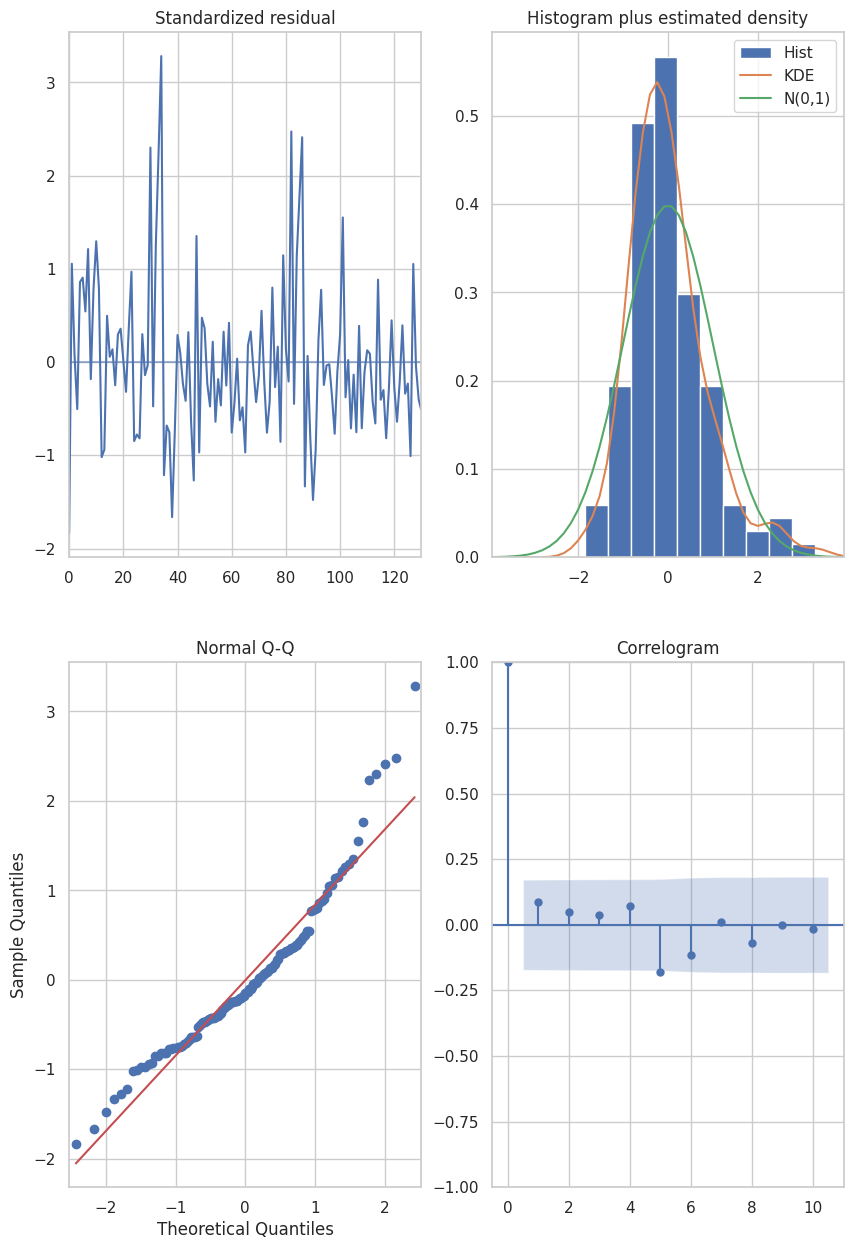

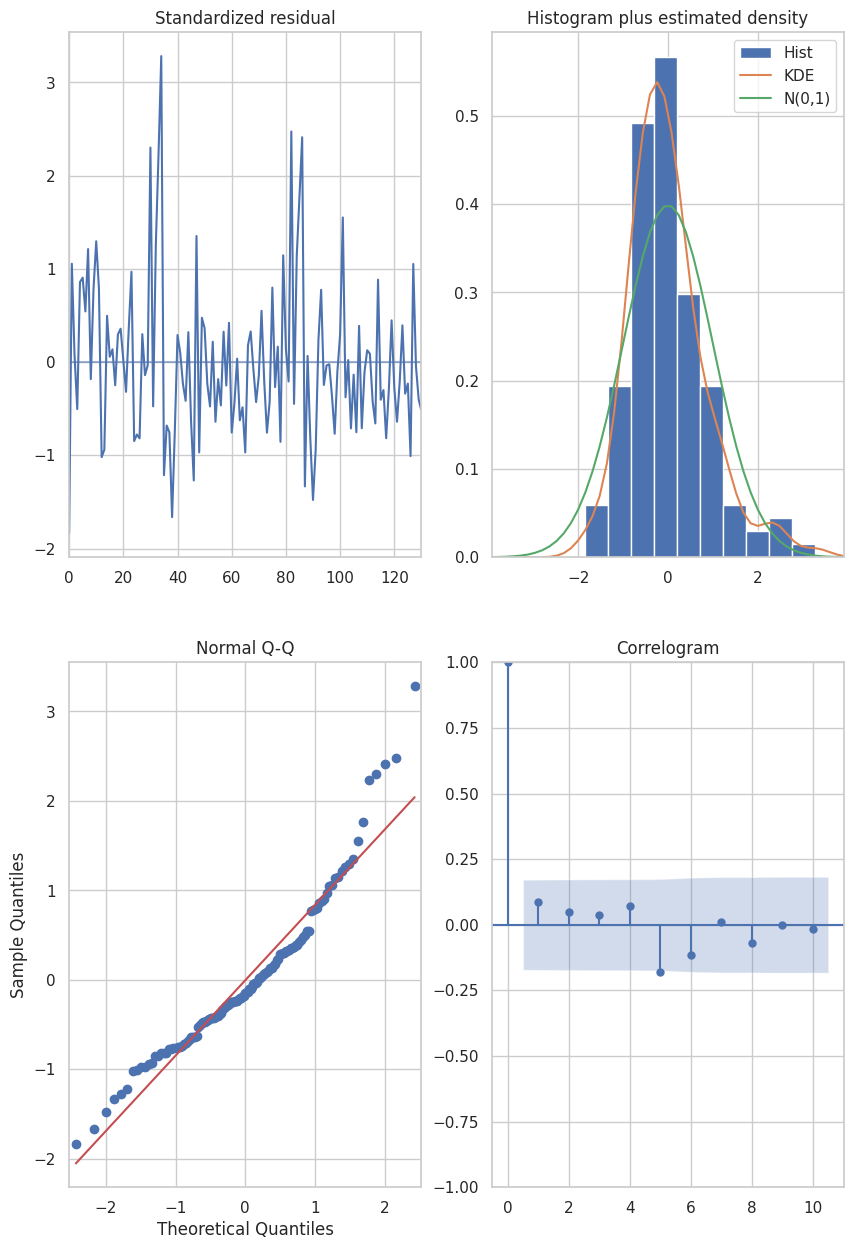

In [ ]:
import pmdarima as pm

results = pm.auto_arima(sales_store1,
                        seasonal=True, # is the time series seasonal
                        m=12, # the seasonal period
                        D=1, # seasonal difference order
                        start_P=1, # initial guess for P
                        start_Q=1, # initial guess for Q
                        max_P=4, # max value of P to test
                        max_Q=4, # max value of Q to test
                        information_criterion='aic', # used to select best model
                        error_action='ignore', # ignore orders that don't work
                        stepwise=True,
                       )
print(results)
print(results.summary())
results.plot_diagnostics()